In [2]:
from brian2 import *

In [12]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(5, eqs, threshold='v>0.8', reset='v = 0', method='exact')

spikemon = SpikeMonitor(G)

run(50*ms)

print(spikemon.t/ms, spikemon.i, spikemon.count)

[16.  16.  16.  16.  16.  32.1 32.1 32.1 32.1 32.1 48.2 48.2 48.2 48.2
 48.2] <spikemonitor_1.i: array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])> <spikemonitor_1.count: array([3, 3, 3, 3, 3])>


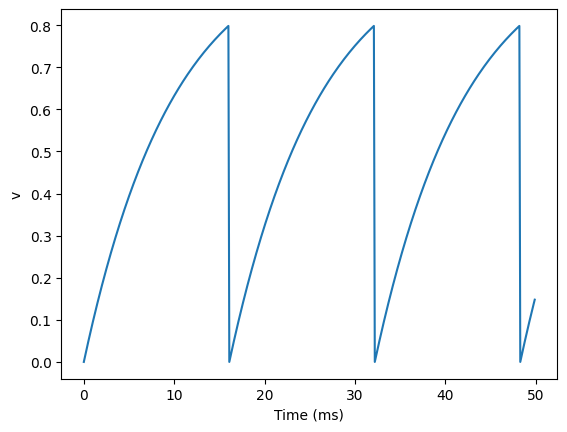

In [4]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(2, eqs, threshold='v>0.8', reset='v = 0', method='exact')

M = StateMonitor(G, 'v', record=0)
run(50*ms)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

In [43]:
neurons_with_classes = {'a': [5, 5, 3], 
                        'b': [1, 1, 3], 
                        'c': [5, 1, 1, 5]}

for key in neurons_with_classes.keys():
            neurons_with_classes[key] = max(neurons_with_classes[key], 
                                            key=neurons_with_classes[key].count)
neurons_with_classes           

{'a': 5, 'b': 1, 'c': 5}